In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def show_mult_img_plt(rows, columns, img_names, titles, vmin=0, vmax=255):
    fig = plt.figure(figsize=(15, 17), dpi=100)
    for i in range(len(img_names)):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img_names[i], cmap='gray', vmin=vmin, vmax=vmax)
        plt.axis('off')
        plt.title(titles[i])

<div style="background-color: #00008B; border: 2px solid #391339; border-radius: 800px; padding: 1px; margin: auto;">
 <p style="text-align:center;"><span style="font-size:24px; text-shadow: 1px 1px #000000;"><span style="color:#ccffff;"><span style="font-family:cursive;"> Ex 01</span> </span>  </span></p>
</div>

## Transformation Formula:
$$
c = -mx + y\\
\rho  = x * Cos(\Theta) + y * Sin(\Theta) 
$$

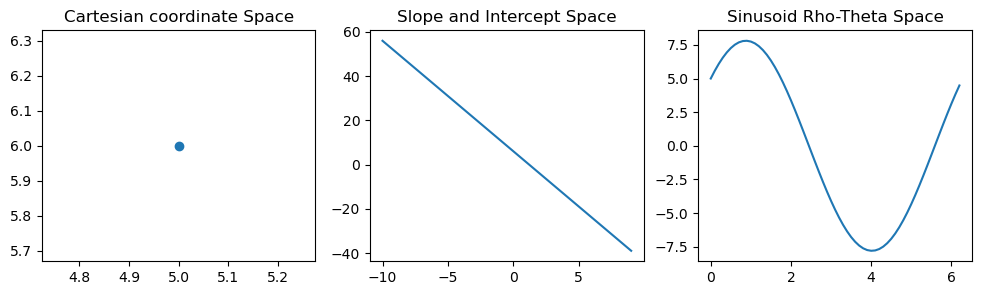

In [5]:
x0 = 5; y0 = 6
m = np.arange(-10,10,1); c = -m*x0 + y0
theta = np.arange(0,2*np.pi,0.1); ro = x0 * np.cos(theta) + y0 * np.sin(theta)

plt.figure(figsize=[12,3])
plt.subplot(1,3,1); plt.plot(x0,y0,'o');    plt.title('Cartesian coordinate Space');
plt.subplot(1,3,2); plt.plot(m,c,'-');      plt.title('Slope and Intercept Space');
plt.subplot(1,3,3); plt.plot(theta,ro,'-'); plt.title('Sinusoid Rho-Theta Space');

<div style="background-color: #00008B; border: 2px solid #391339; border-radius: 800px; padding: 1px; margin: auto;">
 <p style="text-align:center;"><span style="font-size:24px; text-shadow: 1px 1px #000000;"><span style="color:#ccffff;"><span style="font-family:cursive;"> Ex 02</span> </span>  </span></p>
</div>

# a.jpg

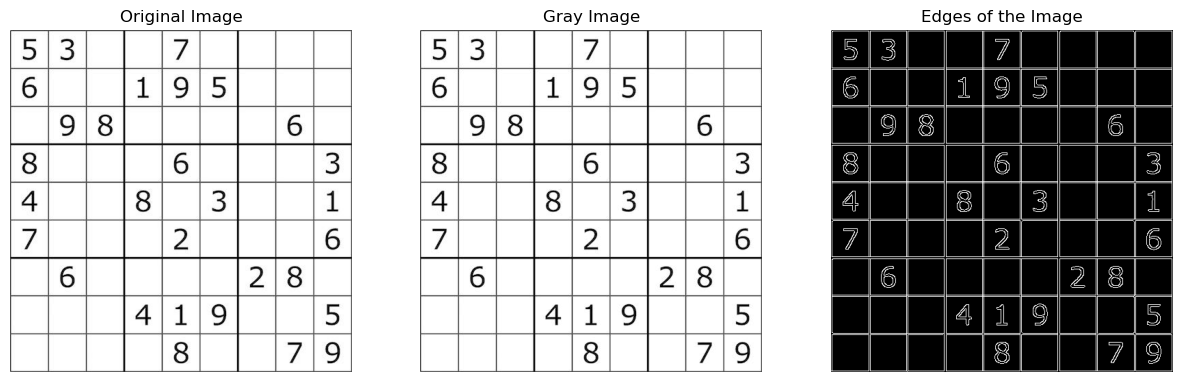

In [57]:
img = cv2.imread('img-ex10/a.jpg',-1); 
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img_gray,100,150)

show_mult_img_plt(1, 3, (img, img_gray, edges),titles=["Original Image", "Gray Image", "Edges of the Image"])

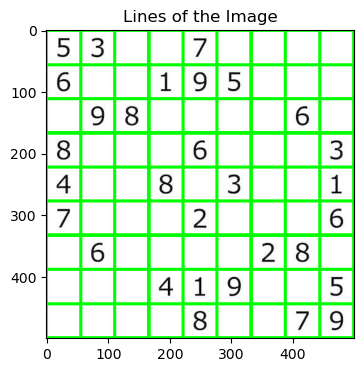

In [58]:
lines = cv2.HoughLines(edges,1,np.pi/180,200)

img_final = img.copy()
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img_final,(x1,y1),(x2,y2),(0,255,0),2)

plt.figure(figsize=[4,4])
plt.imshow(img_final[...,::-1]); plt.title('Lines of the Image'); 

# b.jpg

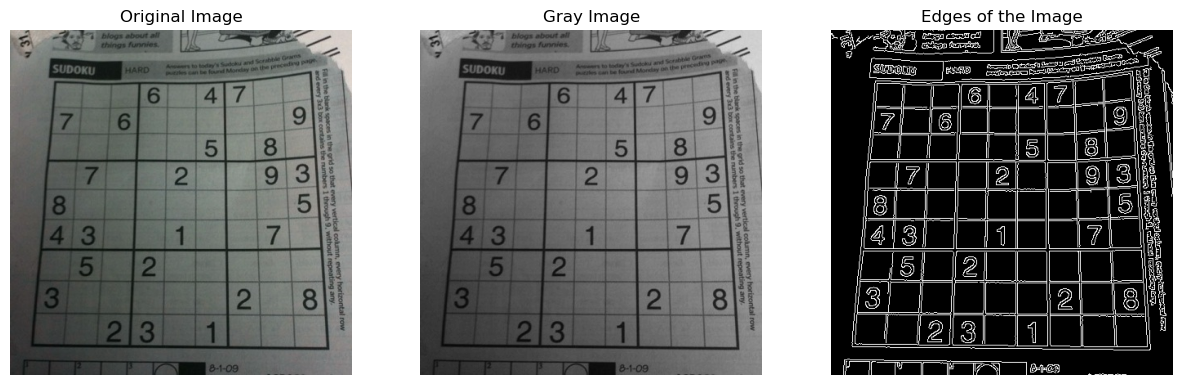

In [72]:
img_b = cv2.imread('img-ex10/b.jpg',-1);
img_b_gray = cv2.cvtColor(img_b,cv2.COLOR_BGR2GRAY)
edges_b = cv2.Canny(img_b_gray,50,120)

show_mult_img_plt(1, 3, (img_b, img_b_gray, edges_b),titles=["Original Image", "Gray Image", "Edges of the Image"])

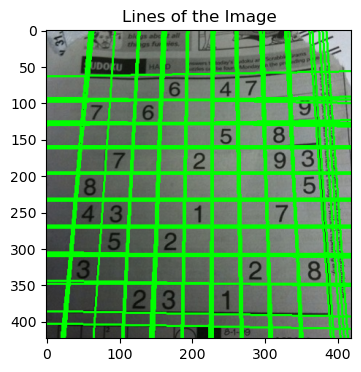

In [77]:
lines_b = cv2.HoughLines(edges_b,1,np.pi/180,165)

img_b_final = img_b.copy()
for line in lines_b:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img_b_final,(x1,y1),(x2,y2),(0,255,0),2)

plt.figure(figsize=[4,4])
plt.imshow(img_b_final[...,::-1]); plt.title('Lines of the Image');  